<a href="https://colab.research.google.com/github/matheusfigueiredoo/detection-of-cyber-attacks/blob/main/main_Multi_LayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest

In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv("drive/MyDrive/MQTTset/train70_augmented.csv", nrows=1000000)
test = pd.read_csv("drive/MyDrive/MQTTset/test30_augmented.csv", nrows=300000)

In [4]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [5]:
# distribuição das targets

print(train['target'].value_counts())
print(test['target'].value_counts())

target
legitimate    499989
bruteforce    100197
slowite       100188
malformed     100067
dos            99869
flood          99690
Name: count, dtype: int64
target
legitimate    150291
bruteforce     30042
flood          30029
malformed      29942
slowite        29864
dos            29832
Name: count, dtype: int64


In [6]:
'''
'rows' e o vetor que sera usado para acumular as linhas que serao excluidas a fim de balancear
as targets
'''
rows_train = []
rows_test = []

for i in train.index:
    if train['target'][i] == 'legitimate':
        rows_train.append(i)

for i in test.index:
    if test['target'][i] == 'legitimate':
        rows_test.append(i)

In [7]:
# aqui, e feita a leitura da diferenca para igualar os valores

rows_train = rows_train[:399989]
rows_test = rows_test[:120000]

In [8]:
# atualizacao e igualacao dos valores

train = train.drop(rows_train)
test = test.drop(rows_test)

print("Dados de treino: ", train['target'].value_counts())
print("Dados de teste: ", test['target'].value_counts())

Dados de treino:  target
bruteforce    100197
slowite       100188
malformed     100067
legitimate    100000
dos            99869
flood          99690
Name: count, dtype: int64
Dados de teste:  target
legitimate    30291
bruteforce    30042
flood         30029
malformed     29942
slowite       29864
dos           29832
Name: count, dtype: int64


In [9]:
# pre processamento de dados
# separacao de features e targets

X_train = train.iloc[:,:-1]
y_train = train['target']

X_test = test.iloc[:,:-1]
y_test = test['target']

print(X_train.shape)
print(X_test.shape)

(600011, 33)
(180000, 33)


In [10]:
# transformacao de targets categoricas em numeros inteiros

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [11]:
label.fit(y_train)
label.fit(y_test)

LabelEncoder()

In [12]:
list(label.classes_)

['bruteforce', 'dos', 'flood', 'legitimate', 'malformed', 'slowite']

In [13]:
y_train = label.transform(y_train)
y_test = label.transform(y_test)

In [14]:
# ajuste de dados

# 'columns' sao as features com valores irrelevantes para o treinamento

columns = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos',
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag',
           'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len',
           'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.msg']

# features = features.drop(columns, axis=1)

X_train = X_train.drop(columns, axis=1)
X_test = X_test.drop(columns, axis=1)


print(X_train.shape)
print(X_test.shape)

(600011, 19)
(180000, 19)


In [15]:
# ajuste de variáveis categóricas

# features = pd.get_dummies(features)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print(X_train.shape)
print(X_test.shape)

(600011, 44)
(180000, 44)


In [16]:
# 'col' sao as features categoricas com valores True/False

col = ['tcp.flags_0x00000002',
       'tcp.flags_0x00000004', 'tcp.flags_0x00000010', 'tcp.flags_0x00000011',
       'tcp.flags_0x00000012', 'tcp.flags_0x00000014', 'tcp.flags_0x00000018',
       'tcp.flags_0x00000019', 'mqtt.conack.flags_0',
       'mqtt.conack.flags_0x00000000', 'mqtt.hdrflags_0',
       'mqtt.hdrflags_0x00000010', 'mqtt.hdrflags_0x00000020',
       'mqtt.hdrflags_0x00000030', 'mqtt.hdrflags_0x00000031',
       'mqtt.hdrflags_0x00000032', 'mqtt.hdrflags_0x0000003a',
       'mqtt.hdrflags_0x00000040', 'mqtt.hdrflags_0x00000050',
       'mqtt.hdrflags_0x00000082', 'mqtt.hdrflags_0x00000090',
       'mqtt.hdrflags_0x000000c0', 'mqtt.hdrflags_0x000000d0',
       'mqtt.hdrflags_0x000000e0', 'mqtt.protoname_0', 'mqtt.protoname_MQTT']

In [17]:
# substituicao dos valores True/False por 1/0 respectivamente

# features[col] = features[col].replace({True: 1, False: 0})

X_train[col] = X_train[col].replace({1: True, 0: False})
X_test[col] = X_test[col].replace({1: True, 0: False})

In [18]:
# features = features.values

X_train = X_train.values
X_test = X_test.values

print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
# embaralhamento de dados

# from sklearn.model_selection import train_test_split

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle=True, random_state=0)

In [21]:
# decision tree

from sklearn.neural_network import MLPClassifier

In [22]:
clf = MLPClassifier()

In [23]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier()

In [24]:
# predição de valores

predict = clf.predict(X_test)

In [25]:
# metrics

from sklearn.metrics import classification_report


print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.77      0.57      0.65     30042
           1       1.00      0.72      0.84     29832
           2       0.48      0.99      0.64     30029
           3       0.99      0.63      0.77     30291
           4       0.90      0.52      0.65     29942
           5       0.62      0.78      0.69     29864

    accuracy                           0.70    180000
   macro avg       0.79      0.70      0.71    180000
weighted avg       0.79      0.70      0.71    180000



In [26]:
print("Accuracy train: {}".format(clf.score(X_train, y_train)))
print("Accuracy test: {}".format(clf.score(X_test, y_test)))

Accuracy train: 0.6974105474732963
Accuracy test: 0.6992


In [27]:
# confusion matrix

from sklearn.metrics import confusion_matrix

In [28]:
matrix = confusion_matrix(y_test, predict)

In [29]:
print(matrix)

[[17109     0  4247     0  1578  7108]
 [   59 21492  8053     0    10   218]
 [    0     0 29642   106     0   281]
 [    0     0 11197 19016    77     1]
 [ 4708     0  3043    75 15437  6679]
 [  436     0  6158     0   110 23160]]


In [30]:
# display matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

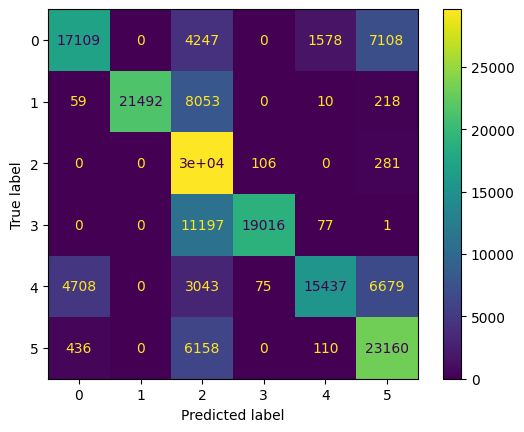

In [31]:
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()